# Integration and label transfer

We are checking if label transfer with scVI/scANVI can improve our annotation.

__created__ = "2025-11-09 Sun 21:49:34 GMT"

__updated__ = "2025-11-09"

__version__ = "0.0.9"

__status__ = "Prototype"

__maintainer__ = "Ciro Ramírez-Suástegui"

__author__ = "Ciro Ramírez-Suástegui"

__affiliation__ = "The Wellcome Sanger Institute"

__email__ = "cs59@sanger.ac.uk, cramsuig@gmail.com"

### Structure <a class="anchor" id="Structure"></a>

* Environment setup
* [Global configuration](#global-configuration)
  - Variables and paths
  - Visualisation parameters
* [Loading data](#loading-data)
* [Pre-processing](#pre-processing)
* [Main](#main)
* [Post-processing](#post-processing)
* [Save](#save)

## Environment setup
---

### Basic modules

In [3]:
import os, sys # paths and files control
import re # string control
import datetime # add current date to output
from pathlib import Path

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [4]:
import gc # garbage collector; gc.collect()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [7]:
import subprocess
project_root = Path(subprocess.run(
    ["git", "rev-parse", "--show-toplevel"],
    check=True,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True,
).stdout.strip())
os.chdir(project_root)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [8]:
sys_path_add = ["codes/cs59", "src/"]
sys_path_add = [i for i in sys_path_add if os.path.exists(i)]
print("Adding %s to sys.path", sys_path_add)
[sys.path.append(i) for i in sys_path_add if i not in sys.path]

Adding %s to sys.path ['codes/cs59', 'src/']


[None, None]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

### In-house/developing modules

In [9]:
# Stuff I use across projects (in src)
import share.code.plotting as spl
import share.code.utils as utils
from share.code.mplborder import BORDER_RC

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

### Logging configuration

In [10]:
from logger import logger, _repo_root, _hide_base_path

[2025-12-08 14:47:08] INFO eCTCL [logger.py:setup_logger:155] Working at /eCTCL


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [11]:
# fmt: off
logger.info(f'Environ: {_hide_base_path(os.__file__)}')
logger.info(f'Project: {_hide_base_path(os.getcwd())} (current path)')
logger.info(os.popen("echo Machine: ${HOSTNAME} ${SLURMD_NODENAME} ${PBS_NODEFILE}").read().rstrip())
# fmt: on

[2025-12-08 14:49:28] INFO eCTCL [984088284.py:<module>:2] Environ: /miniforge3/envs/scvi-tools/lib/python3.11/os.py
[2025-12-08 14:49:28] INFO eCTCL [984088284.py:<module>:3] Project: /eCTCL (current path)
[2025-12-08 14:49:28] INFO eCTCL [984088284.py:<module>:4] Machine: farm22-gpu0305


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

### Tool (packaged) modules

In [12]:
import scanpy as sc
from anndata import read_zarr
import scvi
import pynndescent
import anndata
import numba

/software/cellgen/team361/cs59/miniforge3/envs/scvi-tools/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [13]:
import matplotlib.pyplot as plt # manage plotting styles and parameters

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

## [Global configuration](#menu) <a class="anchor" id="global-configuration"></a>
---

### Variables and paths

Propagation
* **indata_name** > result_name, inputs_file > output_name > output_file
* **action_name** > result_name, output_resu, output_file

In [14]:
indata_name = "sp_b0_hAtlas_AX21"
action_name = "ann-scANVI"
extent_strn = "zarr"
result_name = f"{indata_name}_{action_name}"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [15]:
inputs_path = "../data"
inputs_ref = os.path.join(
    "data/processed/suspension_ruoyan_2024/"
    "8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected_leiden_broad_ct_cell_types_from_main_object.h5ad"
)
inputs_query = "data/processed/xenium_CTCL_hAtlas-v1.1/57__AX21-SKI-0-FFPE-1-S8_qc.zarr"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [16]:
output_resu = os.path.join("intermediate/output", f"{result_name}")
output_figs = os.path.join("intermediate/output", f"{result_name}")
output_name = indata_name

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [17]:
output_file = os.path.join(
    inputs_path, "processed", f"{output_name}_{action_name}.{extent_strn}"
)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [18]:
OUTPUTS = dict()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [19]:
%whos str dict

Variable       Type    Data/Info
--------------------------------
BORDER_RC      dict    n=3
OUTPUTS        dict    n=0
action_name    str     ann-scANVI
extent_strn    str     zarr
indata_name    str     sp_b0_hAtlas_AX21
inputs_path    str     ../data
inputs_query   str     data/processed/xenium_CTC<...>1-SKI-0-FFPE-1-S8_qc.zarr
inputs_ref     str     data/processed/suspension<...>pes_from_main_object.h5ad
output_figs    str     intermediate/output/sp_b0_hAtlas_AX21_ann-scANVI
output_file    str     ../data/processed/sp_b0_h<...>tlas_AX21_ann-scANVI.zarr
output_name    str     sp_b0_hAtlas_AX21
output_resu    str     intermediate/output/sp_b0_hAtlas_AX21_ann-scANVI
result_name    str     sp_b0_hAtlas_AX21_ann-scANVI


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

## [Loading data](#menu) <a class="anchor" id="loading-data"></a>
---

In [20]:
adata_ref = sc.read(inputs_ref, backed="r")

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [21]:
logger.info("Object\n" + adata_ref.__str__())

[2025-12-08 15:21:59] INFO eCTCL [395388470.py:<module>:1] Object
AnnData object with n_obs × n_vars = 419579 × 15790 backed at 'data/processed/suspension_ruoyan_2024/8_CTCL+PRJ+HRA+flex_4k_5dim_100hidd_raw_flex_corrected_leiden_broad_ct_cell_types_from_main_object.h5ad'
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', 'barcode'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'broad_ct_colors', 'cell_type_colors', 'groups1_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'tech_colors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [22]:
adata_query = read_zarr(inputs_query)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

In [23]:
logger.info("Object\n" + adata_query.__str__())

[2025-12-08 15:22:03] INFO eCTCL [1959450451.py:<module>:1] Object
AnnData object with n_obs × n_vars = 30985 × 4997
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'necrotic', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'n_cells'
    obsm: 'spatial'


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAIoG4wzbEkYY/BzZIMEjniVhJgcmkCQJIoMeGhrvFCgP7wh1Aun7fPVd77vpv+SP4ErdCdvb2crZ19r43B/gNOQY6afut/Qb+6IBHghcDi8UaxnpHYchKyTBJT0mmyXhIxshXh3GGHUTlA1NB9AAT/r48/rthOi948nfxtzL2uXZG9pt28/dMOF45YXqMvBV9r/8QQOrCcwPdxWBGsYeJCKDJNIlBiYfJSIjHyAtHGkX9hH9C6sFMP+7+Hzyo+xa58riFN9U3J/aANp92hPctN5O4sXm+OvA8fP3Yf7aBDALMRGyFokbkh+wIsok0SW/JZIkVSIXH/IaAxZxEGQKCgST/S73C/FY6z/m5+Fw3vTbhdot2vDayNyn33bjG+hy7VLzkvkAAG4GrAyLEuAXgRxOICoj/iS/JWYl9SN5IQIerBmWFOcOyQhqAvr7qPWj7xnqMuUU4d3dpdt82mzadNuN3abgquR56fHu5/Qw+5sB+wcfDtoT/xhqHfkgkiMhJZsl/CRJI48g4hxdGCMTWg0uB80AZ/oq9Ebu5+g05FLgW91o24bavNoH3GDes+Ho5eDqdfB+9s38MwOCCYkPHBURGkQelCHpIzIlZSWCJI4ilx+2GwYXqhHKC5MFNP/a+Lby9ezD50bjn9/r3D3bodoc26vcQd/L4jDnTez98RX4aP7GBAAL6BBSFhQbDR8dIi4kMSUfJfcjwyGTHoAaphUrEDgK+QOd/VP3SvGv66zmZuL+3ozcI9vN2o3bXd0v4O/jgOjA7YjzrfkAAFMGdgw9EnsXCRzGH5UiYiQfJcckXSPrIIMdPxk/FKgOpAhgAgz81PXo73bqpOWX4W7eP9wb2wvbDtwe3ivhHuXZ6TnvFvVE+5UB2gfkDYYTlhjuHG4g/CKEJPwkXyS0IgUgZxz2F9ISIg0QB8oAf/pd9JHuSemq5Njg7t0D3CTbWdug3O7eM+JW5jnrtvCm9tv8JQNZCUcPwxSjGcMdBiFRI5UkxyTnI/shEh9BG6QWXxGYC3wFN//4+O7yRe0p6L/jKOCA3djbP9u420Ddy99H45nnoOw48jf4b/6xBNIKoRDzFaIaiR6MIZUjlCSCJF8jNCESHg8aShXnDw0K6AOo/Xj3iPEF7Bfn5OKK3yLdv9tr2yfc8N224Gbk4+gN7r3zyPkAADgGQgzwERcXkhs/HwMiyCOCJCwkyCJgIAYd1RjqE2oOgAhWAhz8//Ut8NHqE+YY4vze1ty326fbp9yu3q3hj+U26oDvRPVY+44BuAepDTMTLhhzHOUfaCLpI18kxiMhIn0f7xuRF4IS6gzyBsYAlvqO9Nvuqeke5Vvhft6b3MDb9Ns13XrfseLD5pHr9/DN9uj8GAMyCQcPaxQ2GUYdeiC8IvojLCRPI2shjh7NGkQWFRFnC2QFO/8W+SXzle2O6Dfkr+AS3nHc29tS3NPdVODA4wDo8uxy8lj4df6eBKQKWhCXFTEaCB7/IP8i+SPnI8kiqCCTHaEZ8BSjD+IJ2AOx/Zz3xvFa7IHnX+MT4LbdWdwG3L/cgN464dvkRelZ7vHz4vkAAB4GDgykEbUWHRu7HnMhMSPoI5MjNCLXH4wcaxiVEy0OXAhMAi38KfZw8CrrgeaW4offa91R3EHcPN073y7i/+WT6sbvcvVs+4cBmAdvDeISxxf7G14f1iFSI8UjLiOQIfgeeRstFzQStAzVBsMArfq+9CTvB+qP5d3hDN8x3VrcjdzJ3QTgLeMu5+frN/H09vX8CwMLCccOFRTMGMoc8B8pImIjkyO6It4gDR5cGuYVzRA3C04FPv8z+Vzz4+3x6KzkNOGh3gjddNzp3GTe2uA45GXoQ+2s8nj4fP6KBHcKFRA7FcIZiR1zIGoiYSNPIzYiHiAWHTUZmBRhD7gJxwO7/b/3AvKt7Ojn2OOa4Efe79ye3FTdDt+94U7lpemk7iT0/PkAAAQG2wtZEVUWqxo5HuUgnCJQI/wipCFQHxMcBBhCE/ENOAhCAj38U/ax8IPr7eYT4xHg/d3o3Njcz93F36zibebt6grwnvV/+4EBeAc2DZISYxeFG9keRyG8Ii4jmSICIXUeBRvLFucRfgy4BsAAxPru9GvvZOr/5V3il9/E3fHcI91Z3ovgp+OX5zzsdfEb9wL9/gLlCIkOwBNjGFAcaR+YIcwi/CInIlMgjh3sGYkVhhAICzcFQf9Q+ZHzL+5T6SDltuEu35zdCt193fLeXeGt5Mnoku3k8pj4gv53BEsK0Q/hFFUZDB3qH9khyyK6IqUhlh+bHMoYQRQgD48JtwPF/eL3PfL/7E7oT+Qf4dbehN003efdmd894r7lBOrt7lb0FfoAAOoFqQsQEfcVOhq5HVogCSK6ImgiFSHLHpwbnhfxErYNFgg5Ak38fPby8NnrV+eN45jgjd583W3dYN5O4Cjj2uZH607wyvWS+3oBWAf+DEMSABcQG1YeuiApIpkiByJ3IPQdkhpqFpsRSQybBr0A2vod9bHvwOpt5triIeBV3oXdtt3o3hDhH+T+55Dss/FA9w798QK/CEsObBP8F9gb5B4KITkiaCKWIcofER1/GS4VQBDZCiEFRP9s+cbze+6z6ZLlNuK53y3ent0P3n7f3+Eh5Svp4O0c87f4if5kBB8Kjg+JFOoYkRxjH0ohOCInIhchEB8iHGEY6xPgDmcJqAPO/QX4d/JP7bPoxOSi4WLfFt7H3XfeIuC74i7mYeo274f0LvoAANEFdwvHEJoVyxk7HdEfeSEnItchiSBJHicbOxehEnwN8wcvAl38pPYy8S/sv+cG5B3hG98O3v/d7t7U4KLjROee65Dw9fWl+3QBOQfHDPYRnhaeGtYdLyCZIQcidyHtH3YdIhoLFlERFQx/BrkA8PpL9fbvGuva5lXjp+Dk3hfeR95035PhleRk6OLs7/Fl9xv95QKaCA8OGhOWF2IbYh5+IKgh1iEIIUQflhwTGdUU+w+rCgsFR/+I+fnzxe4R6gLmtOJC4LzeL96f3gfgX+KT5YzpLe5S89b4j/5RBPQJTA8yFIEYGBzeHr0gpyGXIYsgjR6rG/oXlxOhDj8JmAPY/Sf4sPKe7RXpOOUi4uzfpd5Y3gXfqeA345vmvep977j0R/oAALkFRwuAED8VXhm/HEof7CCXIUchACDJHbQa2BZSEkMN0gcmAmz8zPZx8YLsJuh85J/hpt+e3o/eet9Y4Rrkref069LwIPa4+24BGgeRDKoRPxYtGlgdpx8KIXch6SBmH/kcsxmuFQcR4gtkBrYABft49TrwcutE58/jLOFw36be1t793xTiCeXI6DPtK/KK9yf92QJ2CNMNyRIyF+4a4R31HxkhRyF9IL8eHRypGHwUuA9+CvYESv+j+Sz0Du9u6nDmMOPI4Enfvt4s34/g3OID5uvpeO6I8/T4lf4/BMoJDA/dExkYoRtbHjIgGSEIIQEgCx41G5QXRBNjDhgJiQPh/Uj46fLs7XbpqeWh4nTgMt/m3pHfLuGw4wbnF+vD7+j0X/oAAKAFFws7EOUU8hhGHMYeYCAJIbsgeB9LHUMaeBYEEgsNsQcdAnv88/au8dXsi+jw5CDiL+Ar3x3fBODa4ZDkFOhJ7BLxSvbK+2gB/AZcDF8R4RW+GdwcIR9/IOkgXiDhHn4cRxlSFb8QsAtJBrMAGvul9X3wyeut50bkr+H53zTfY9+F4JLie+Uq6YPtZfKt9zP9zQJSCJkNeRLQFnwaYx1tH40guiDzHz0ephtAGCYUdQ9RCuEETf+++V70Ve/J6tzmquNM4dTfS9+33xThV+Nx5knqwu698xL5m/4tBKEJzA6JE7MXLBvbHaofjSB9IHofjB3CGjEX8hImDvEIegPq/Wj4IPM47tbpGOYd4/ngvd9y3xrgsOEo5

## [Pre-processing](#menu) <a class="anchor" id="pre-processing"></a>
---

### Subset to overlapping genes and adapting query to ref

In [24]:
features_overlap = adata_ref.var_names.isin(adata_query.var_names)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [25]:
logger.info(f"Overlapping features: {sum(features_overlap)}/{len(features_overlap)}")

[2025-11-11 12:32:35] INFO eCTCL [3189299779.py:<module>:1] Overlapping features: 4472/15790


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

Adapting query to reference

In [26]:
adata_query.layers["raw_counts"] = adata_query.layers["counts"].copy()
del adata_query.layers["counts"]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [27]:
adata_query.obs["batch"] = adata_query.obs["file_id"].copy()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [28]:
adata_query.obs["n_counts"] = adata_query.obs["total_counts"].copy()
del adata_query.obs["total_counts"]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [29]:
adata_query.obs["n_genes"] = adata_query.obs["n_genes_by_counts"].copy()
del adata_query.obs["n_genes_by_counts"]

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [30]:
adata_query

AnnData object with n_obs × n_vars = 677350 × 4986
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'necrotic', 'n_genes', 'file_id', 'obs_names_before_b1_hAtlas', 'batch', 'n_counts'
    var: 'feature_types', 'gene_ids', 'genome', 'highly_variable', 'log1p_mean_counts', 'log1p_total_counts', 'mean_counts', 'n_cells', 'n_cells_by_counts', 'n_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'dataset', 'hvg', 'log1p', 'neighbors', 'pca', 'preprocessing', 'umap', 'wildcards'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'normcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Subsetting to one sample

In [32]:
adata_query.obs["batch"].value_counts()

batch
DG18-SKI-0-FFPE-1-S2    198930
DG16-SKI-0-FFPE-1-S2    125313
DG14-SKI-0-FFPE-1-S2     87802
DG38-SKI-0-FFPE-2-S2     85078
DG21-SKI-0-FFPE-1-S2     54207
DG39-SKI-0-FFPE-1-S2     35057
DG19-SKI-0-FFPE-1-S2     25629
DG45-SKI-0-FFPE-2-S2     24246
DG41-SKI-0-FFPE-1-S2     23841
DG40-SKI-0-FFPE-1-S2     17247
Name: count, dtype: int64

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [33]:
adata_query_subset_bool = adata_query.obs["batch"].isin(["DG14-SKI-0-FFPE-1-S2"])

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Merging objects

In [31]:
adata_ref = adata_ref[:, features_overlap].to_memory()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [42]:
adata = anndata.concat(
    [
        adata_ref,
        adata_query[adata_query_subset_bool, adata_ref.var_names]
    ],
    join="outer",          # keep shared genes only
    merge="same",          # only combine if obs/var fields are identical, preserve the rest with np.nan
    label="ref_query",        # new column showing original dataset name
    keys=["ref", "query"],
    uns_merge="unique",
)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [43]:
adata

AnnData object with n_obs × n_vars = 507381 × 4472
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', 'barcode', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'necrotic', 'file_id', 'obs_names_before_b1_hAtlas', 'ref_query'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'broad_ct_colors', 'cell_type_colors', 'groups1_colors', 'leiden', 'neighbors', 'tech_colors', 'dataset', 'pca', 'preprocessing', 'umap'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs', 'X_pca', 'X_umap', 'spatial'
    layers: 'raw_counts', 

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [44]:
del adata_ref
del adata_query

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [46]:
gc.collect()

32263

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

## [Main](#menu) <a class="anchor" id="main"></a>
---

### Training scVI model as base

In [47]:
import pandas as pd

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [50]:
scvi.model.SCVI.setup_anndata(adata, layer="raw_counts", batch_key="batch")

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [51]:
scvi_model = scvi.model.SCVI(adata, n_layers=2, n_latent=30)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [52]:
scvi_model.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA H100 80GB HBM3') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 16/16: 100%|██████████| 16/16 [05:54<00:00, 22.08s/it, v_num=1, train_loss_step=1.07e+3, train_loss_epoch=1.06e+3]

`Trainer.fit` stopped: `max_epochs=16` reached.


Epoch 16/16: 100%|██████████| 16/16 [05:54<00:00, 22.14s/it, v_num=1, train_loss_step=1.07e+3, train_loss_epoch=1.06e+3]


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [53]:
SCVI_LATENT_KEY = "X_scVI_5k"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [54]:
adata.obsm[SCVI_LATENT_KEY] = scvi_model.get_latent_representation()

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Training scANVI model

In [57]:
SCANVI_CELLTYPE_KEY = "celltype_scanvi"
adata.obs[SCANVI_CELLTYPE_KEY] = "Unknown"
cell_mask = adata.obs["ref_query"] == "ref"
adata.obs[SCANVI_CELLTYPE_KEY][cell_mask] = adata.obs["cell_type"][cell_mask].values

/tmp/ipykernel_1191884/3904802393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[SCANVI_CELLTYPE_KEY][cell_mask] = adata.obs["cell_type"][cell_mask].values


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [58]:
pd.crosstab(adata.obs[SCANVI_CELLTYPE_KEY], adata.obs["ref_query"], dropna=False)

ref_query,ref,query
celltype_scanvi,,
B_cell,15213,0
Basal,358,0
DC1,5258,0
DC2,9810,0
Differentiated_KC,24687,0
Differentiated_KC*,11016,0
F1,2188,0
F2,20246,0
F3,6719,0


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [61]:
scvi_model.view_anndata_setup() # to check the label key

Anndata setup with scvi-tools version 1.3.2.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'raw_counts',
│   'batch_key': 'batch',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   52   │
│         n_cells          │ 507381 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   1    │
│          n_vars          │  4472  │
└──────────────────────────┴────────┘

                Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location     ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['raw_counts'] │
│    batch     │  adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels']  │
└──────────────┴────────────────────────────┘

                       batch State Registry                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃      Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch'] │          0           │          0          │
│                    │          1           │          1          │
│                    │          2           │          2          │
│                    │          3           │          3          │
│                    │          4           │          4          │
│                    │          5           │          5          │
│                    │          6           │          6          │
│                    │          7           │          7          │
│                    │          8           │          8          │
│                    │          9           │          9          │
│                    │          10          │         10          │
│                    │          11          │         11          │
│                    │          12          │         12          │
│                    │          13          │         13          │
│                    │          14          │         14          │
│                    │          15          │         15          │
│                    │          16          │         16          │
│                    │          17          │         17          │
│                    │          18          │         18          │
│                    │          19          │         19          │
│                    │          20          │         20          │
│                    │          21          │         21          │
│                    │          22          │         22          │
│                    │          23          │         23          │
│                    │          24          │         24          │
│                    │          25          │         25          │
│                    │          26          │         26          │
│                    │          27          │         27          │
│                    │          28          │         28          │
│                    │          29          │         29          │
│                    │          30          │         30          │
│                    │          31          │         31          │
│                    │          32          │         32          │
│                    │          33          │         33          │
│                    │          34          │         34          │
│                    │          35          │         35          │
│                    │          36          │         36          │
│                    │          37          │         37          │
│                    │          38          │         38          │
│                    │          39          │         39          │
│                    │ DG14-SKI-0-FFPE-1-S2 │         40          │
│                    │   PR001409E_18_1A    │         41          │
│                    │     PR2533_18_1A     │         42          │
│                    │   PR004642T_15_1A    │         43          │
│                    │   PR008096T_19_1A    │         44          │
│                    │   PR018817H_21_1B    │         45          │
│                    │   PR030476F_16_1A    │         46          │
│                    │   PR037703E_16_2A    │         47          │
│                    │   PR038176R_19_1A    │         48          │
│                    │   PR819876Q_20_1A    │         49          │
│                    │   PR824258V_20_2A    │         50          │
│                    │   PR839543V_20_1A    │         51          │
└────────────────────┴──────────────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [63]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    scvi_model,
    adata=adata,
    unlabeled_category="Unknown",
    labels_key=SCANVI_CELLTYPE_KEY,
)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [64]:
scanvi_model.view_anndata_setup() # to check the label key

Anndata setup with scvi-tools version 1.3.2.

Setup via `SCANVI.setup_anndata` with arguments:

{
│   'labels_key': 'celltype_scanvi',
│   'unlabeled_category': 'Unknown',
│   'layer': 'raw_counts',
│   'batch_key': 'batch',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None,
│   'use_minified': False
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   52   │
│         n_cells          │ 507381 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   49   │
│          n_vars          │  4472  │
└──────────────────────────┴────────┘

                Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location     ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['raw_counts'] │
│    batch     │  adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels']  │
└──────────────┴────────────────────────────┘

                       batch State Registry                        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃      Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch'] │          0           │          0          │
│                    │          1           │          1          │
│                    │          2           │          2          │
│                    │          3           │          3          │
│                    │          4           │          4          │
│                    │          5           │          5          │
│                    │          6           │          6          │
│                    │          7           │          7          │
│                    │          8           │          8          │
│                    │          9           │          9          │
│                    │          10          │         10          │
│                    │          11          │         11          │
│                    │          12          │         12          │
│                    │          13          │         13          │
│                    │          14          │         14          │
│                    │          15          │         15          │
│                    │          16          │         16          │
│                    │          17          │         17          │
│                    │          18          │         18          │
│                    │          19          │         19          │
│                    │          20          │         20          │
│                    │          21          │         21          │
│                    │          22          │         22          │
│                    │          23          │         23          │
│                    │          24          │         24          │
│                    │          25          │         25          │
│                    │          26          │         26          │
│                    │          27          │         27          │
│                    │          28          │         28          │
│                    │          29          │         29          │
│                    │          30          │         30          │
│                    │          31          │         31          │
│                    │          32          │         32          │
│                    │          33          │         33          │
│                    │          34          │         34          │
│                    │          35          │         35          │
│                    │          36          │         36          │
│                    │          37          │         37          │
│                    │          38          │         38          │
│                    │          39          │         39          │
│                    │ DG14-SKI-0-FFPE-1-S2 │         40          │
│                    │   PR001409E_18_1A    │         41          │
│                    │     PR2533_18_1A     │         42          │
│                    │   PR004642T_15_1A    │         43          │
│                    │   PR008096T_19_1A    │         44          │
│                    │   PR018817H_21_1B    │         45          │
│                    │   PR030476F_16_1A    │         46          │
│                    │   PR037703E_16_2A    │         47          │
│                    │   PR038176R_19_1A    │         48          │
│                    │   PR819876Q_20_1A    │         49          │
│                    │   PR824258V_20_2A    │         50          │
│                    │   PR839543V_20_1A    │         51          │
└────────────────────┴──────────────────────┴─────────────────────┘

                           labels State Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃     Categories      ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['celltype_scanvi'] │       B_cell        │          0          │
│                              │        Basal        │          1          │
│                              │         DC1         │          2          │
│                              │         DC2         │          3          │
│                              │  Differentiated_KC  │          4          │
│                              │ Differentiated_KC*  │          5          │
│                              │         F1          │          6          │
│                              │         F2          │          7          │
│                              │         F3          │          8          │
│                              │       ILC1_3        │          9          │
│                              │       ILC1_NK       │         10          │
│                              │        ILC2         │         11          │
│                              │       Inf_mac       │         12          │
│                              │        LC_1         │         13          │
│                              │        LC_2         │         14          │
│                              │        LC_3         │         15          │
│                              │        LC_4         │         16          │
│                              │         LE1         │         17          │
│                              │         LE2         │         18          │
│                              │       Macro_1       │         19          │
│                              │       Macro_2       │         20          │
│                              │      Mast_cell      │         21          │
│                              │     Melanocyte      │         22          │
│                              │        MigDC        │         23          │
│                              │      Mono_mac       │         24          │
│                              │         NK          │         25          │
│                              │     Pericyte_1      │         26          │
│                              │     Pericyte_2      │         27          │
│                              │       Plasma        │         28          │
│                              │  Proliferating_KC   │         29          │
│                              │      Schwann_1      │         30          │
│                              │      Sebaceous      │         31          │
│                              │         Tc          │         32          │
│                              │      Tc17_Th17      │         33          │
│                              │    Tc_IL13_IL22     │         34          │
│                              │         Th          │         35          │
│                              │        Treg         │         36          │
│                              │ Undifferentiated_KC │         37          │
│                              │         pDC         │         38          │
│                              │         VE1         │         39          │
│                              │         VE2         │         40          │
│                              │         VE3         │         41          │
│                              │       basal2        │         42          │
│                              │       channel       │         43          │
│                              │       immune        │         44          │
│                              │       moDC_1        │         45          │
│                              │       moDC_2        │         46          │
│                              │       moDC_3        │         47        

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [65]:
scanvi_model.train(
    max_epochs=20,
    n_samples_per_label=200
)

INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [15:38<00:00, 45.92s/it, v_num=1, train_loss_step=1.12e+3, train_loss_epoch=1.05e+3]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [15:38<00:00, 46.94s/it, v_num=1, train_loss_step=1.12e+3, train_loss_epoch=1.05e+3]


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Predicting labels

In [66]:
SCANVI_LATENT_KEY = "X_scANVI_5k"
SCANVI_PREDICTION_KEY = "C_scANVI"

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [67]:
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [68]:
adata.obs[SCANVI_PREDICTION_KEY] = scanvi_model.predict(adata)

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Generate scANVI viz

In [77]:
adata

AnnData object with n_obs × n_vars = 507381 × 4472
    obs: 'Sanger_ID', 'tissue', 'site', 'Sex', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'study', 'donor', 'tech', 'cell_type', 'barcode', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'necrotic', 'file_id', 'obs_names_before_b1_hAtlas', 'ref_query', '_scvi_batch', '_scvi_labels', 'celltype_scanvi', 'C_scANVI'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'broad_ct_colors', 'cell_type_colors', 'groups1_colors', 'leiden', 'neighbors', 'tech_colors', 'dataset', 'pca', 'preprocessing', 'umap', 'C_scANVI_colors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

### Visualise embedding and prediction

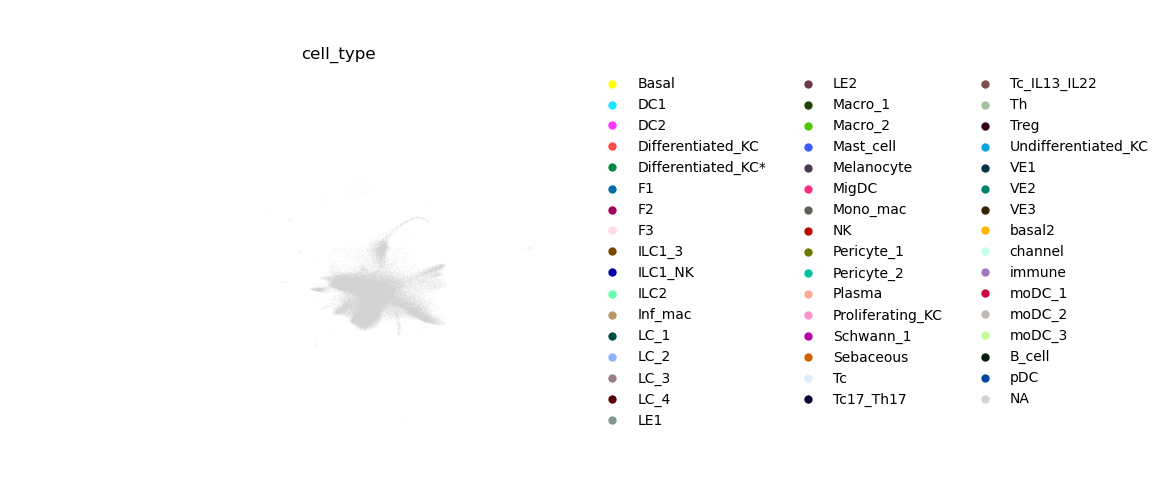

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [69]:
fig_config = {
    "plot_type": "umap",
    "col_var": "cell_type",
}
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            adata,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            frameon=False,
        )
    })

In [71]:
fig_config["plot_type"] = "umap-scanvi"
fig_config["col_var"] = "cell_type"
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            adata,
            basis=SCANVI_LATENT_KEY,
            color=fig_config["col_var"],
            return_fig=True,
            frameon=False,
        )
    })

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [72]:
fig_config["col_var"] = SCANVI_PREDICTION_KEY
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            adata,
            basis=SCANVI_LATENT_KEY,
            color=fig_config["col_var"],
            return_fig=True,
            frameon=False,
        )
    })

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

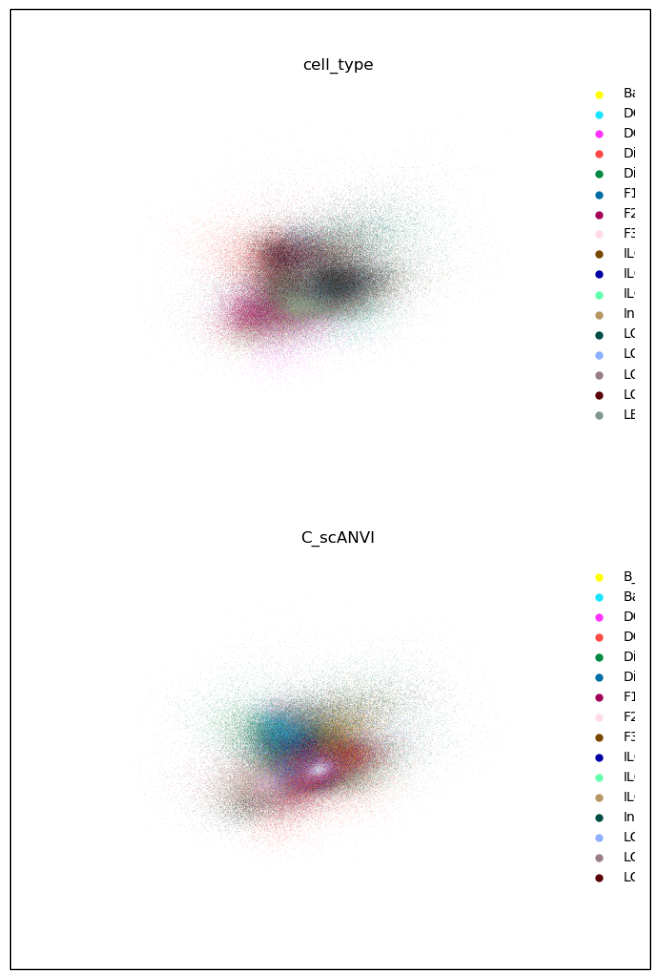

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [74]:
spl.fig_grid([v for k, v in OUTPUTS.items() if "umap-scanvi" in k], ncols=1)

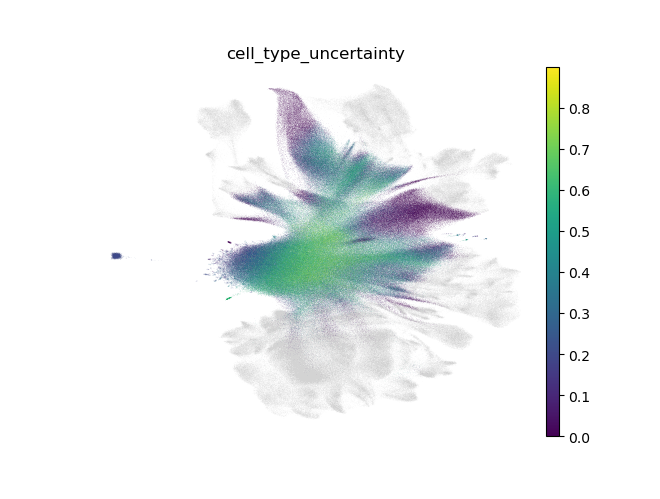

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [104]:
colors = [l + "_uncertainty" for l in label_keys]
fig_config["col_var"] = colors[0]
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            combined_emb,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            frameon=False,
        )
    })

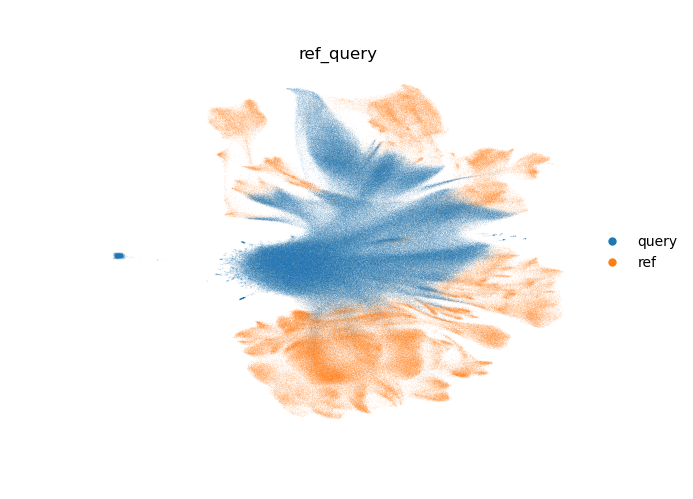

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [100]:
fig_config["col_var"] = "ref_query"
filename = utils.filename_create(**spl.filename_plot(fig_config))
with plt.rc_context({"patch.linewidth": 0.001}):
    OUTPUTS.update({
        filename: sc.pl.embedding(
            combined_emb,
            basis="X_umap",
            color=fig_config["col_var"],
            return_fig=True,
            **fig_config["params"],
        )
    })

In [ ]:
sc.pp.calculate_qc_metrics(
    combined_emb, percent_top=None, log1p=False, inplace=True
)

## [Post-processing](#menu) <a class="anchor" id="post-processing"></a>
---

In [105]:
temp = list(OUTPUTS.keys())
logger.info(f"Outputs captured ({len(temp)}):\n " + "\n ".join(temp))

[2025-11-10 14:16:55] INFO eCTCL [641707671.py:<module>:2] Outputs captured (5):
 umap___cell-type-pred_____
 umap___cell-type-pred_____frameon:False
 umap___ref-query_____frameon:False
 umap___cell-type_____frameon:False
 umap___cell-type-uncertainty_____frameon:False


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [ ]:
temp = list(OUTPUTS.keys())
OUTPUTS_FINAL = OUTPUTS.copy()

In [ ]:
for i in temp:
    if len(re.findall(r"params|colours", i)) > 0:
        del OUTPUTS_FINAL[i]

In [ ]:
temp = list(OUTPUTS_FINAL.keys())
logger.info(f"Outputs to write ({len(temp)}):\n " + "\n ".join(temp))

## [Save](#menu) <a class="anchor" id="save"></a>
---

In [106]:
output_resu

'./results/sp_b1_hAtlas_ann-scANVI'

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [107]:
utils.output_save_list(OUTPUTS, output_resu)

Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/00_umap___cell-type-pred_____  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/01_umap___cell-type-pred_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/02_umap___ref-query_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/03_umap___cell-type_____frameon:False  √
Storing<class 'matplotlib.figure.Figure'>
./results/sp_b1_hAtlas_ann-scANVI/04_umap___cell-type-uncertainty_____frameon:False  √


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [81]:
scanvi_model.save(inputs_query.replace(".zarr", "_ref_model"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [82]:
query_model.save(inputs_query.replace(".zarr", "_model"))

<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [83]:
logger.info(f"Saving results to:\n{output_file}")

[2025-11-11 16:20:37] INFO eCTCL [1882014874.py:<module>:1] Saving results to:
../data/processed/sp_b1_hAtlas_DG14_ann-scANVI.zarr


<source src="data:audio/wav;base64,UklGRg5kAABXQVZFZm10IBAAAAABAAEARKwAAIhYAQACABAAZGF0YepjAAAAAOYKehVtH3UoTzDANpc7sj74P2E/8Dy5ONsygivkIkIZ5Q4YBC/5eO5F5OHak9KZyybGY8JtwFHAEMKexd/KrNHT2RfjMe3Y97kChw3vF6QhXSraMeI3SDzsPrs/rT7MOy038jBKKW8goRYsDFwBg/by6/bh29jl0E/KSsX8wX3A2MAKwwPHpszH0zLcqOXi75T6bAUdEFQaxyMtLEoz5zjbPAk/YD/ePY86ijX2LgQn7x37E3MJpv7i83rput/s1lHPIcmMxLPBq8B7wR/EgciBzvLVnd5A6JXyTP0XCKUSpxzTJeUtnzTQOVE9CD/pPvQ8ODnRM+gssCRnG1IRvAb1+0zxEueS3RTV1s0QyOvDh8H2wDvCTcUVynDQLNgS4d7qSPUAALgKHxXoHsongy/YNZs6qD3pPlU+7zvJNwQyyipQItcYpQ4HBEz5wu665H7bVNN3zBvHaMN6wV7BFsOVxsDLcNJ12pHjge36964CTg2KFxYhqikHMfU2STviPa0+pD3POkQ2IzCbKOUfQhb4C1YBrPZG7HXigdms0TLLQ8YCw4nB48EMxPTHf82C1MrcGOYm8Kv6VQXYD+UZLyNyK3Ey9jfaO/49VD7ZPJc5pzQvLl8mcB2nE0sJq/4V9NnpQuCZ1x/QCcqHxbrCt8GEwhzFbMlSz6TWKt+l6M3yWP30B1YSLhwzJSItwDPbOE08/T3fPfI7Rjj2MiosFSTzGggRnwYG/Irxe+cj3snVqs78yOnEkMIBwkDDRcb5yjnR1diV4TjrdfUAAIoKxhRmHiInui70NKM5ozzfPU098TrdNjAxFSq/IW4YZw72A2j5C+8u5RncEdRRzQzIaMSCwmfCGMSIx53MMdMU2wnkz+0c+KMCFg0mF4og+ig3MA02TjrcPKQ9nzzWOV41Vy/wJ14f4xXGC1AB0/aa7PLiJNpw0hLMN8cExJLC6sIKxeLIVc461V/dheZp8MH6PwWVD3cZmiK7KpsxCjfdOvg8TD3XO6M4yTNsLb0l9BxUEyQJsf5I9DfqyeBE2OnQ7sp/xr7DvsKIwxXGU8og0FPXtd8I6QXzY/3TBwgStxuWJGMs5TLqN0479zzZPPQ6WDceMm8rfCOBGsAQgwYX/Mfx4+ez3nzWe8/lyePFlMMHw0HEOsfay//Re9kW4pDrovUAAF4KbhTlHXwm9C0UNK84ozvZPEk8+Dn1NWAwYykwIQcYKw7lA4T5U++f5bHcy9QnzvjIZcWGw2zDFcV3yHbN79Ow24DkHO4++JcC3gzEFgAgTChrLyg1WDnbO588nzviOHw0jy5HJ9oehxWUC0sB+vbs7G3jxNox0+3MJ8gCxZbD7MMDxsvJJ8/v1fHd8ear8Nf6KAVTDwsZCCIGKsowITbkOfY7STzaOrM37jKsLB0leRwCE/0It/559JPqTeHt2LDRzstyx73EwcOIxArHNsvr0P/XPuBp6Tzzbv2yB7wRQhv7I6grDjL+NlM69TvXO/s5bjZKMbgq5iIRGnkQaAYn/ATySehA3yvXSdDKytnGk8QJxD7FKsi2zMHSHtqU4ubrzvUAADIKFxRmHdklMS04M783pzrYO0o7AjkRNZQvsyikIKEX7w3VA6D5mu8P5kbdgdX6zuHJXcaGxGzED8ZiyUzOqdRJ3PTkaO5e+IwCqAxkFnkfoiejLkc0ZTjeOp87ozrxN54zyi2gJlceLBVjC0UBIPc97ebjYdvv08bNFMn8xZXE6sT5xrDK9s+h1oHeW+fs8O36EwUTD6EYeCFUKfsvPDXvOPg6SjvhOcg2FjLvK4AkARyxEtcIvP6q9O7qz+GS2XTSq8xiyLfFwMSExfvHFcyy0anYxODJ6XLzef2RB3ERzhpjI+8qOjEVNlw59zraOgU5hzV6MAMqUyKjGTQQTAY4/D/yrejK39jXEtGry8vHj8UHxTfGFsmPzYHTvtoR4zvs+fUAAAcKwhPqHDklcixfMtM2rjnbOk86ETgwNMouBygaID0XtA3EA7v53+995tndNdbKz8bKUMeCxWjFBMdJyh7PYdXh3Gblsu5/+IICcgwFFvQe+ibdLWozdjfkOaI6qzkEN8QyCC39Jdcd0hQzC0ABRveM7V3k/Nup1JrO/MnxxpHF5MXqx5LLwdBQ1w/fw+cs8QP7/QTTDjkY6iClKDAvWjT+N/85TzrsOOA1QjE1K+UjihtiErEIwf7a9EfrT+I02jXThM1Nya7Gu8V7xujI8cx20k/ZSOEn6qfzhP1xBycRXRrNIjkqajAwNWo4/jnhORQ4pTStL1EpwSE2Ge8PMgZI/HnyEOlT4ILY2dGJzLnIhsYAxivH/8llzj3UXNuL44/sI/YAANwJbxNwHJwktiuKMes1ujjiOVk5JDdTMwQuXieSH9sWeg20A9X5I/Dp5mre5taW0KfLQMh5xmDG9ccsy+3PFdZ13dfl++6e+HcCPgyoFXEeVSYbLZAyjDbvOKo5tzgcNu0xSixcJVgdehQDCzsBa/fa7dLkldxh1WvP4crjx4jG2sbXyHDMidH815rfKuhr8Rj76ASUDtMXXyD5J2gufTMRNwk5WDn7N/w0cjB+Kk0jFhsUEo0Ix/4J9Z7rzOLU2vPTWs40yqDHssZux9HJyc030/PZyuGD6tzzjv1SB98Q7Rk6IocpnS9PNHs3CDnsOCc3xjPjLqIoMiHLGKwPGAZX/LLycenZ4CnZnNJjzaPJecf2xhzI48o3z/bU99sE5OHsTfYAALIJHRP3GwEk/Sq4MAc1yjftOGY4OjZ6MkEttyYMH3oWQQ2lA+/5ZvBT5/jelNde0YXMLMltx1TH4sgMzLnQxtYH3kbmQ++++G0CCgxNFfAdsyVdLLoxpTX/N7Y4xzc3NRoxjiu+JNwcIxTVCjUBj/cn7kXlK90V1jnQwcvQyHvHzMfByUrNTdKm2CTgj+io8S370wRWDm4X1h9QJ6QtozIoNhg4ZjgONxw0pS/KKbgioxrIEWkIzP449fXrSONy263ULM8Yy4/IpMdeyLfKnc7005TaSuLe6g/0mf0zB5cQgBmpIdco0y5yM5A2Fzj7Nz026zIdLvYnpiBiGGkP/gVn/Ovy0Olc4c7ZXNM5zonKaMjnxwjJxMsF0KzVj9x65DLtdvYAAIkJzBKBG2kjRyrqLyc03jb8N3c3VTWlMYIsEyaJHhsWCQ2VAwn6qfC754TfP9gk0l/NFMpcyETIy8nnzIHRddeX3rLmiu/c+GIC1wvyFHEdFCWhK+gwwjQSN8Y32zZVNEow1iojJGIczhOnCjABs/dy7rblvt3G1gPRnsy6yWrIusimyiDOD9NM2arg8ujl8UH7vwQaDgsXTx+qJuMszTFDNSs3dzclNj8z2y4ZKSUiMhp9EUUI0f5l9UnsweMM3GTV+8/4y3rJkshJyZjLbs+v1DLbyOI360H0o/0UB1EQFBkbISooDS6YMqk1KjcON1g1EzJZLU0nHCD7FygP5AV2/CLzLure4W/aGdQLz2vLVMnUyPHJoczQ0GDWJd3v5ILtnvYAAGEJfBING9MilCkfL0oz9jUPN402czTTMMYrciUIHr0V0QyGAyL66fAi6A3g59jm0jXO+MpIyTDJscrAzUXSINgl3x7n0O/7+FgCpQuaFPUcdyToKhkw4zMpNto28jV4M30vISqKI+obehN6CisB1ve97iXmT95118rReM2fylbJpMmIy/POzdPw2S/hU+kh8lX7qwTeDakWyx4GJiUs+jBhNEE2jDZANWYyFS5rKJUhxBkzESII1v6S9Z3sOeSl3BnWxtDUzGDKfckxynbMPNBm1c7bROOP63P0rf32BgwQqhiPIIAnSi3CMcY0QDYlNnY0QDGaLKcmlB+WF+gOywWF/Fjzi+pe4g7b09Taz0rMO8q+ydbKes2Y0

In [ ]:
adata.write(output_file.replace(".zarr", "_combined.h5ad"))

Done.